In [1]:
import numpy as np # 1 
import pandas as pd # 2 
import matplotlib.pyplot as plt
import math 
import random


In [2]:
cabecalho = ['coluna 1', 'coluna 2']
dataset = pd.read_csv("cluster.dat", decimal=".", sep=' ', names=cabecalho)
dataset

,coluna 1,coluna 2
0,1555.0,28.65
1,1490.0,27.55
2,1445.0,28.35
3,1415.0,28.80
4,1375.0,28.05
...,...,...
568,3420.0,27.95
569,3465.0,26.85
570,3525.0,26.00
571,3570.0,26.15


In [3]:
class KmeansTeste:
  def __init__(self, k):
    self.k = k
  def __distancia (self,v1,v2):
    sum = 0
    for i in range(len(v1)):
      sum += pow(v1[i] - v2[i],2)
    return math.sqrt(sum)
  def inertia(self):
    soma = 0
    for i in range(len(self.C)):
      d = self.__distancia(self.centroides[int(self.C[i])], self.data.iloc[i,:])
      soma += pow(d,2)
    return soma
  def __calcCluster(self,data, centroides,k):
    ret = np.zeros(len(data))
    A = 0
    for i in range(len(data)):
      dMin = self.__distancia(data.iloc[i,:], centroides[0])
      ret[i] = 0
      for j in range(1, k):
        d = self.__distancia(data.iloc[i,:], centroides[j])
        if d < dMin:
          dMin = d
          ret[i] = j
    return ret
  def __atualizarCentroides(self,cluster,data,centroides):
    media = np.zeros((self.k,2, data.shape[1]))
    for i in range(len(cluster)):
      for j in range(data.shape[1]):
        media[int(cluster[i])][0][j] += data.iloc[i,j]
        media[int(cluster[i])][1][j] += 1
    for i in range(self.k):
      for j in range(data.shape[1]):
        centroides[i][j] = media[i][0][j] / media[i][1][j]
    return centroides 

  def __getIniCentroides(self, mode='k-means++'):
    l,c = self.data.shape
    if mode.lower().strip() == 'k-means++':
  
      #Primeiro centroide
      np.random.seed(0)
      self.centroides = np.zeros((self.k, c))
      self.centroides[0] = self.data.iloc[np.random.choice(l),:]
      distancia_para_centroide = np.zeros(l)
      for i in range(l):
        distancia_para_centroide[i] = self.__distancia(self.centroides[0], self.data.iloc[i,:])
      for i in range(1,self.k):
        prob = distancia_para_centroide ** 2
        index = np.random.choice(l,size=1, p=prob/np.sum(prob))
        self.centroides[i] = self.data.iloc[index,:]
        distancia_nova = np.zeros(l)
        for j in range(l):
          distancia_nova[j] = self.__distancia(self.centroides[i], self.data.iloc[j,:])
          distancia_para_centroide[j] = np.min((distancia_para_centroide[j], distancia_nova[j]))
    elif mode.lower().strip() == 'random':
      self.centroides = np.zeros((self.k,c))
      for i in range(self.k):
        for j in range(c):
          centroideRand = random.randint(0,l)
          self.centroides[i][j] = self.data.iloc[centroideRand,j]
    else:
      raise NameError('Tipo de inicialização de centroide invalido!')

  def fit(self, data, init_centroides = 'k-means++'):
    self.data = data.copy()
    self.__getIniCentroides(init_centroides)
    self.C = self.__calcCluster(self.data,self.centroides,self.k)
    continua = True
    while(continua):
      centroidesN = self.__atualizarCentroides(self.C,self.data, self.centroides)
      continua = False
      for i in range(self.k):
        for j in range(self.data.shape[1]):
          if self.centroides[i][j] != centroidesN[i][j]:
            continua = True
      self.centroides = centroidesN
      self.C = self.__calcCluster(self.data,self.centroides,self.k)  
  def predict(self,data):
    return self.__calcCluster(data.copy(), self.centroides,self.k)

  def fit_predict(self,data, init_centroides = 'k-means++'):
    self.fit(data, init_centroides)
    return self.predict(self.data)

In [4]:
def splitData(data, p=0.9):
  embaralhado = data.iloc[np.random.permutation(len(data))]
  d1 = embaralhado.iloc[0:int(embaralhado.shape[0]*p),:]
  d2 = embaralhado.iloc[int(embaralhado.shape[0]*p):,:]
  return d1,d2

In [5]:
def normalizar(data, norms):
  
    for i in range(data.shape[1]):
      norm = np.linalg.norm(data.iloc[:,i])
      data.iloc[:,i] /= norm
      norms.append(norm)

    return data

In [12]:
def plotarGrafico(clusters,x, y,titulo, labelX='x', labelY='y',  save=True, centroides=None):
  dicionarioCores = {0 : 'red', 1 : 'blue', 2: 'green', 3: 'pink', 4: 'yellow'}
  label_color = [dicionarioCores[l] for l in clusters]
  plt.figure(figsize = (12,12))
  plt.scatter(x,y, c=label_color, alpha=0.3) 
  plt.xlabel(labelX, fontsize=18)
  plt.ylabel(labelY, fontsize=18)
  plt.title(titulo)
  if centroides != None:
    plt.scatter(centroides[0],centroides[1], marker='X',s=200, c='red')
  if save:
    plt.savefig(titulo + '.png')
  plt.show()

In [8]:
treino, teste = splitData(dataset, 0.9)

In [9]:
normsTreino = []
normTreino = normalizar(treino.copy(),normsTreino)
normsTeste = []
normTeste = normalizar(teste.copy(),normsTeste)
norms = []
normDataset = normalizar(dataset.copy(),norms)

In [10]:
k = 3
km = KmeansTeste(k)
km.fit(normDataset,init_centroides='k-means++')
X_cl = km.predict(normDataset)

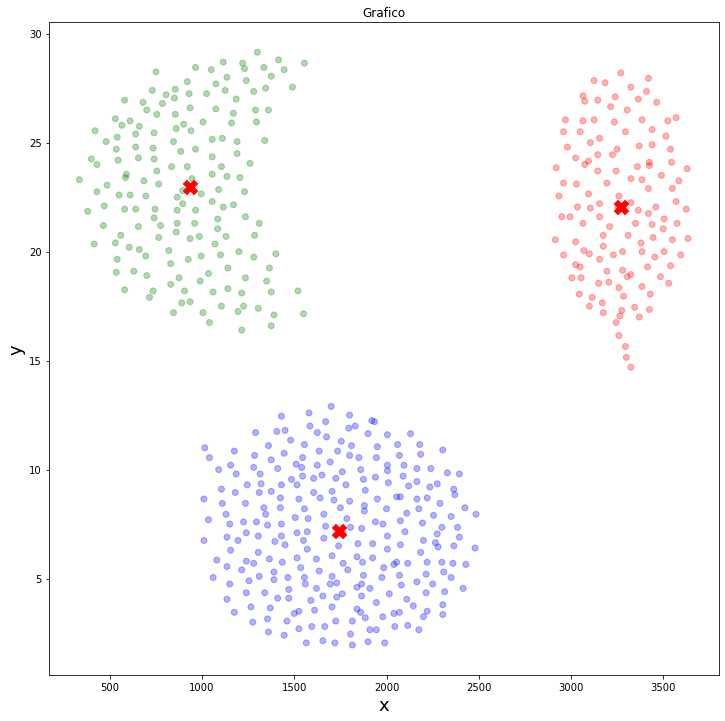

In [13]:
c1 = 0
c2 = 1
plotarGrafico(X_cl, x=dataset.iloc[:,c1], y=dataset.iloc[:,c2], centroides=[km.centroides[0:k,c1]*norms[c1], km.centroides[0:k,c2]*norms[c2]], titulo= "Grafico")

In [14]:
k = 3
km = KmeansTeste(k)
km.fit(normDataset,init_centroides='k-means++')
X_cl = km.predict(normDataset)

In [15]:
def elbow(data,K=range(1,10)):
  somaDosQuadrados = []
  for k in K:
    km = KmeansTeste(k)
    km.fit(data)
    somaDosQuadrados.append(km.inertia())
  plt.plot(K, somaDosQuadrados, 'x-')
  plt.xlabel('k')
  plt.ylabel('Soma dos quadrados')
  plt.title('Elbow')
  plt.show()

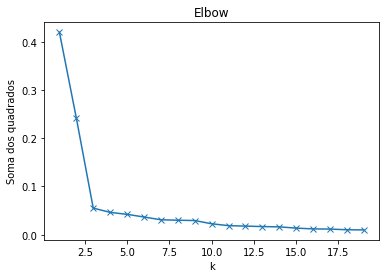

In [16]:
elbow(normDataset)